# Architecture of Neural Network Regression

| Hyperparameter | Typical Value |
|:------------------:|:--------------:|
| <span style="color: lightblue;">Input Layer shape</span> | Same shape as number of features |
|<span style="color: aqua;">Hidden Layer(s)</span>|Problem specific, minimum = 1 maximum = n|
|<span style="color: lightgreen;">Neurons per hidden layer</span>|Problem specific, generally 10,100|
|<span style="color: yellow;">Output Layer shape</span>|Same shape as desired prediction shape|
|<span style="color: red;">Hidden activation</span>|Usually ReLU (rectified linear unit)|
|<span style="color: orange;">Output activation</span>|None, ReLu, logistic/tanh|
|<span style="color: pink;">Loss function</span>|MSE(mean square error) or MAE (mean absolute error)/Huber(combination of MAE/MSE) if outliers|
|<span style="color: lavender;">Optimizer</span>|SGD(stochastic gradient descent)|

model = tf.keras.Sequential\(\[
    </br>
    &emsp;<span style="color: lightblue;">tf.keras.Input(shape=(3,))</span>,</br>
    &emsp;<span style="color: aqua;">tf.keras.layers.Dense(<span style="color: lightgreen;">100</span>, <span style="color: red;">activation="relu"</span>)</span>,</br>
    &emsp;<span style="color: aqua;">tf.keras.layers.Dense(<span style="color: lightgreen;">100</span>, <span style="color: red;">activation="relu"</span>)</span>,</br>
    &emsp;<span style="color: aqua;">tf.keras.layers.Dense(<span style="color: lightgreen;">100</span>, <span style="color: red;">activation="relu"</span>)</span>,</br>
    &emsp;tf.keras.layers.Dense(<span style="color: yellow;">1</span>, <span style="color: orange;">activation=None</span>)</br>
\]\)

model.compile\(</br>
&emsp;<span style="color: pink;">loss=tf.keras.losses.mae</span>,</br>
&emsp;<span style="color: lavender;">optimizer=tf.keras.optimizers.Adam</span>(lr=0.0001),</br>
&emsp;metrics=["mae"]</br>
\)

model.fit\(X_train, Y_train, epochs=100\)

### Introduction to Regression with Neural Networks in Tensorflow
There are many definitions for a regression problem but in our case, we will simplify it: Predicting a numerical variable based on some other combination of variables

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

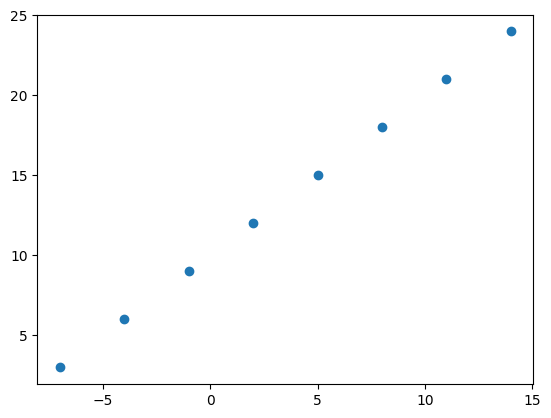

In [3]:
# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], dtype=np.float32)

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], dtype=np.float32)

# Visualize data
plt.scatter(X, y)

In [5]:
# Relationship of the function to the data
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
# Input and Output shapes
house_info = tf.constant(["bedrrom", "bathrooms", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrrom', b'bathrooms', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [11]:
# want to predict the price of a house x[0] to predict y[0], etc
print(X[0], y[0], X[1], y[1]) # etc

-7.0 3.0 -4.0 6.0


In [12]:
# Current Shapes
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [13]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)

### Steps in Modeling

***Creating a model***: 

- define input and output layers

- define hidden layers of a deep learning model

***Compiling a model***: 

- define the loss function

    - the function which tells our model how wrong it is
        
- define the optimizer


    - tells our model how to improve the patterns its learning

- define evaluation metrics

    - what we can use to interpret the performance of the model

***Fitting a model***:

- letting the model try to find patterns between X & y


In [9]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Alternativly
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(), # stochastic radient descent
    metrics=['mae']
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 165ms/step - loss: 11.9775 - mae: 11.9775
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.8450 - mae: 11.8450
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.7125 - mae: 11.7125
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.5800 - mae: 11.5800
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 11.4475 - mae: 11.4475


In [19]:
# Check out X and y
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Try to make a prediction using the model
y_pred = model.predict([17])
y_pred

1/1 [==============================] - 0s 28ms/step


array([[12.274584]], dtype=float32)

In [22]:
# The model is not very accurate
# We see tat it has a loss and mae around 11
# But even if we add the loss to the prediction value,
# we would still be off of want prediction we would expect
# That being the y prediction for X = 17, should be y = 27

y_pred + 11

array([[23.274584]], dtype=float32)

### Improving the model 

You can imporve the model by altering the steps taken to create the model

***Creating a model***: 

- increase the number of hidden units (neurons)

- change the activation functions of each layer

***Compling a model***: 

- change the optimization function or learning rate

***Fitting a model***:

- fit a model for more epochs or on more data


Note: the learning rate is the most important hyperparameter of many neural networks

In [10]:
# Rebuild model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # UPDATED EPOCHS TO 100 (times model is trained)


Epoch 1/100
1/1 [==============================] - 0s 155ms/step - loss: 20.4049 - mae: 20.4049
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 20.1236 - mae: 20.1236
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 19.8424 - mae: 19.8424
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 19.5611 - mae: 19.5611
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 19.2799 - mae: 19.2799
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 18.9986 - mae: 18.9986
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 18.7174 - mae: 18.7174
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 18.4361 - mae: 18.4361
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 18.1549 - mae: 18.1549
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 17.8736 - mae: 17.8736
Epoch 11/100
1/1 [==============================] - 0s 2m

In [11]:
# See if prediction is accurate 
y_pred = model.predict([17])
y_pred

1/1 [==============================] - 0s 65ms/step


array([[29.360249]], dtype=float32)

In [14]:
# Add a hidden layer to the model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# See if prediction is accurate
y_pred = model.predict([17])
y_pred


Epoch 1/100
1/1 [==============================] - 0s 159ms/step - loss: 13.2237
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 12.7053
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.1826
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.6503
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.1039
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5419
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9604
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.3641
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7453
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.0881
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3910
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 6.6405
Epoch 13/100
1/1 [==============================] - 0

array([[32.33528]], dtype=float32)

In [20]:
# Add Adams optimizer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# See if prediction is accurate
y_pred = model.predict([17])
y_pred

Epoch 1/100
1/1 [==============================] - 0s 172ms/step - loss: 10.5550
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5505
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5460
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5415
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5370
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5325
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5280
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5235
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5190
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5145
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5100
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5055
Epoch 13/100
1/1 [=============================

array([[16.104397]], dtype=float32)

In [21]:
# All updates
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# See if prediction is accurate
y_pred = model.predict([17])
y_pred

Epoch 1/100
1/1 [==============================] - 0s 237ms/step - loss: 13.0589
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 12.9715
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.8841
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7967
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 12.7094
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 12.6221
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 12.5346
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 12.4470
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 12.3593
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 12.2716
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 12.1837
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 12.0957
Epoch 13/100
1/1 [=============================

array([[26.602213]], dtype=float32)